In [1]:
#test push change 2 

import os
import torch
import pandas as pd
import numpy as np
import torchvision
import torch.nn
from torch.utils.data import Dataset, random_split, DataLoader
import matplotlib.pyplot as plt
from torchvision.datasets import DatasetFolder
import PIL.Image as Image
from bs4 import BeautifulSoup


In [2]:
fname = os.path.basename('Images').split('.')[0]
breed_dir = os.path.basename(os.path.dirname('Images'))
anpath = os.path.basename('../Annotation')
annotation = os.path.join(anpath,breed_dir,fname)
print(fname)
print(breed_dir)
print(anpath)
print(annotation)

Images

Annotation
Annotation/Images


In [58]:

def loader_bounded(path):
    with open(path, 'rb') as f:
        img = Image.open(f)
        transform = torchvision.transforms.Compose([torchvision.transforms.PILToTensor()])
        img = transform(img)
        fname = os.path.basename(path).split('.')[0]
        breeddir = os.path.basename(os.path.dirname(path))
        anpath = os.path.basename('../Annotation')
        annotation = os.path.join(anpath,breeddir,fname)
        with open(annotation, 'r') as annot:
            data = annot.read()
        xml_data = BeautifulSoup(data, 'xml')
        xmin = int(xml_data.find('xmin').contents[0])
        ymin = int(xml_data.find('ymin').contents[0])
        xmax = int(xml_data.find('xmax').contents[0])
        ymax = int(xml_data.find('ymax').contents[0])
        #bbox = [xmin, ymin, xmax, ymax]
        #bbox = torch.tensor(bbox).unsqueeze(0)
        #bboximg = torchvision.utils.draw_bounding_boxes(img, bbox, width=3, colors="red")
        cropimg = torchvision.transforms.functional.crop(img, ymin, xmin, ymax-ymin, xmax-xmin)
        return cropimg
    

def rename(name):
    return ''.join(name.split('-')[1:])
    
folderPath=os.path.basename('../Images')
dataset = DatasetFolder(folderPath, loader_bounded, extensions=('.jpg'))
dataset

Dataset DatasetFolder
    Number of datapoints: 20580
    Root location: Images

In [4]:
breeds = []

for n in dataset.classes:
    breeds.append(rename(n))
    
dataset.classes = breeds
dataset.classes

['Chihuahua',
 'Japanese_spaniel',
 'Maltese_dog',
 'Pekinese',
 'ShihTzu',
 'Blenheim_spaniel',
 'papillon',
 'toy_terrier',
 'Rhodesian_ridgeback',
 'Afghan_hound',
 'basset',
 'beagle',
 'bloodhound',
 'bluetick',
 'blackandtan_coonhound',
 'Walker_hound',
 'English_foxhound',
 'redbone',
 'borzoi',
 'Irish_wolfhound',
 'Italian_greyhound',
 'whippet',
 'Ibizan_hound',
 'Norwegian_elkhound',
 'otterhound',
 'Saluki',
 'Scottish_deerhound',
 'Weimaraner',
 'Staffordshire_bullterrier',
 'American_Staffordshire_terrier',
 'Bedlington_terrier',
 'Border_terrier',
 'Kerry_blue_terrier',
 'Irish_terrier',
 'Norfolk_terrier',
 'Norwich_terrier',
 'Yorkshire_terrier',
 'wirehaired_fox_terrier',
 'Lakeland_terrier',
 'Sealyham_terrier',
 'Airedale',
 'cairn',
 'Australian_terrier',
 'Dandie_Dinmont',
 'Boston_bull',
 'miniature_schnauzer',
 'giant_schnauzer',
 'standard_schnauzer',
 'Scotch_terrier',
 'Tibetan_terrier',
 'silky_terrier',
 'softcoated_wheaten_terrier',
 'West_Highland_white_t

In [23]:
class DogBreedDataset(Dataset):
    def __init__(self, ds, transform=None):
        self.ds = ds
        self.transform = transform
        self.classes = ds.classes
    
    def __len__(self):
        return len(self.ds)
    
    def __getitem__(self, idx):
        img, label = self.ds[idx]
        if self.transform:
            img = self.transform(img)
        return img, label

loader_transform = torchvision.transforms.Resize((224,224))
    
dog_data = DogBreedDataset(dataset, transform=loader_transform)

In [24]:
dog_data.classes[dog_data[0][1]]

'Chihuahua'

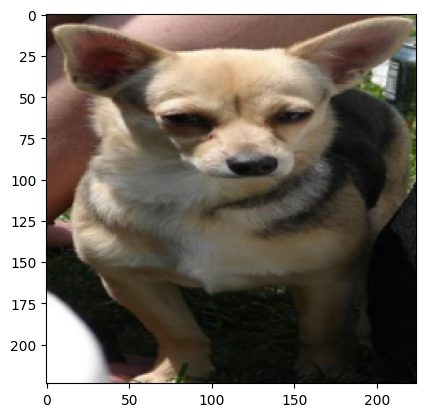

In [25]:
img = dog_data[0][0]
transform = torchvision.transforms.functional.to_pil_image
img = transform(img)
plt.imshow(img)
plt.show()


In [26]:
dataloader = DataLoader(dog_data, batch_size=9, shuffle=True)

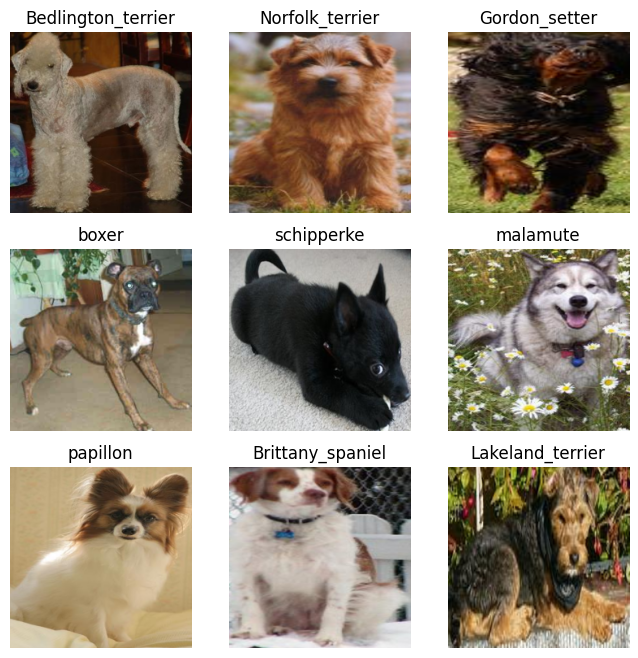

In [57]:
figure = plt.figure(figsize=(8,8))
cols, rows = 3, 3
images, labels = next(iter(dataloader))

for i, image in enumerate(images):
    label = labels[i]
    figure.add_subplot(rows, cols, i+1)
    plt.title(dog_data.classes[label])
    plt.axis('off')
    plt.imshow(transform(image.squeeze()))
plt.show()
    
